In [81]:
import numpy as np
import matplotlib.pyplot as plt
from geomdl import BSpline
from geomdl import BSpline
from geomdl import knotvector

In [82]:
control_points = np.zeros((6250,16,2))
control_points[:,7:9:,0] += 1. 

int_pts_x = np.linspace(start=.1, stop=.9, num=5)
int_pts_x_neg = np.flipud(int_pts_x)
for i in range(6250):

    int_pts_y = np.random.uniform(low=0.1, high=0.8, size=5)
    int_pts_y_neg = np.random.uniform(low=0.1, high=0.8, size=5) * -1.

    int_pts_pos = np.dstack((int_pts_x, int_pts_y)).squeeze()
    int_pts_neg = np.dstack((int_pts_x_neg, int_pts_y_neg)).squeeze()

    control_points[i,2:7,:] = int_pts_pos
    control_points[i,9:14,:] = int_pts_neg


In [83]:
print(control_points[0])

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.1         0.45881071]
 [ 0.3         0.761488  ]
 [ 0.5         0.56645702]
 [ 0.7         0.63045632]
 [ 0.9         0.52462592]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.9        -0.65696461]
 [ 0.7        -0.30238485]
 [ 0.5        -0.73570572]
 [ 0.3        -0.11362463]
 [ 0.1        -0.72556351]
 [ 0.          0.        ]
 [ 0.          0.        ]]


In [85]:
import geomdl
geomdl.__version__

'5.2.9'

<Figure size 432x288 with 0 Axes>

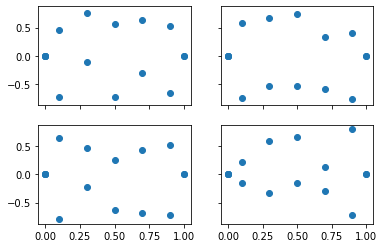

In [86]:
f = plt.figure()
f,axes = plt.subplots(2, 2, sharex=True, sharey=True)
sc = axes[0][0].scatter(control_points[0,:,0], control_points[0,:,1])
axes[0][1].scatter(control_points[1,:,0], control_points[1,:,1])
axes[1][0].scatter(control_points[2,:,0], control_points[2,:,1])
axes[1][1].scatter(control_points[3,:,0], control_points[3,:,1])
plt.show()

In [87]:
pc = np.empty((6250,1000,2))
normals = np.empty((6250,1000,3))

In [88]:
print(normals[0].shape)

(1000, 3)


In [89]:
from tqdm import tqdm
for i in tqdm(range(10)):
    # Create the curve instance
    crv = BSpline.Curve()

    # Set degree
    crv.degree = 2

    # Set control points
    crv.ctrlpts = control_points[i].tolist()

    # Generate knot vector
    crv.knotvector = knotvector.generate(crv.degree, 16)

    # Set evaluation delta
    crv.delta = 0.001

    points = crv.evalpts

    pc[i] = np.asarray(points[:-1])
    # print(np.asarray(points).shape)

    temp = []
    for j in range(len(points)-1):
        x = crv.normal((j/len(points))+0.00001)
        temp.append(x[-1])
    normals[i] = - np.asarray(temp)

100%|██████████| 10/10 [00:01<00:00,  7.16it/s]


<Figure size 432x288 with 0 Axes>

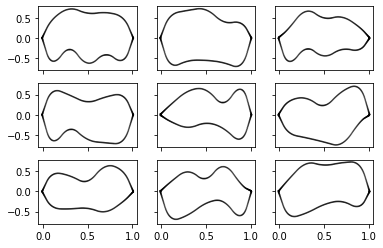

In [90]:
f = plt.figure()
f,axes = plt.subplots(3, 3, sharex=True, sharey=True)
sc = axes[0][0].quiver(pc[0,:,0], pc[0,:,1], normals[0,:,0], normals[0,:,1])
axes[0][1].quiver(pc[1,:,0], pc[1,:,1], normals[1,:,0], normals[1,:,1])
axes[1][0].quiver(pc[2,:,0], pc[2,:,1], normals[2,:,0], normals[2,:,1])
axes[1][1].quiver(pc[3,:,0], pc[3,:,1], normals[3,:,0], normals[3,:,1])
axes[2][0].quiver(pc[4,:,0], pc[4,:,1], normals[4,:,0], normals[4,:,1])
axes[2][1].quiver(pc[5,:,0], pc[5,:,1], normals[5,:,0], normals[5,:,1])
axes[2][2].quiver(pc[6,:,0], pc[6,:,1], normals[6,:,0], normals[6,:,1])
axes[0][2].quiver(pc[7,:,0], pc[7,:,1], normals[7,:,0], normals[7,:,1])
axes[1][2].quiver(pc[8,:,0], pc[8,:,1], normals[8,:,0], normals[8,:,1])
plt.show()

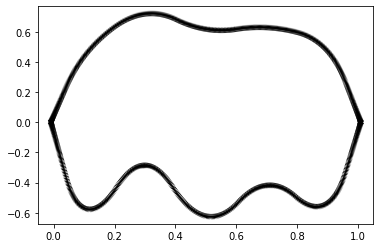

In [91]:
i = 0
plt.quiver(pc[i,:,0], pc[i,:,1], normals[i,:,0], normals[i,:,1])

In [92]:
import os
datasets_path = '/data/bkhara/diffnet/examples/poisson/single_instance/pc-generated-from-nurbs'
np.savez_compressed(os.path.join(datasets_path, 'point_cloud.npz'),pc)
np.savez_compressed(os.path.join(datasets_path, 'normals.npz'),normals)

In [93]:
pc = np.load(os.path.join(datasets_path, 'point_cloud.npz'))['arr_0']
normals = np.load(os.path.join(datasets_path, 'normals.npz'))['arr_0']

<Figure size 432x288 with 0 Axes>

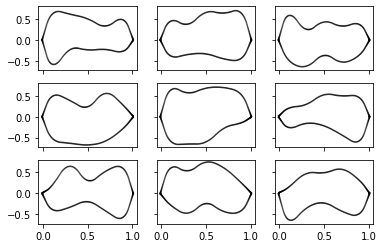

In [94]:
f = plt.figure()
f,axes = plt.subplots(3, 3, sharex=True, sharey=True)
sc = axes[0][0].quiver(pc[0,:,0], pc[0,:,1], normals[0,:,0], normals[0,:,1])
axes[0][1].quiver(pc[1,:,0], pc[1,:,1], normals[1,:,0], normals[1,:,1])
axes[1][0].quiver(pc[2,:,0], pc[2,:,1], normals[2,:,0], normals[2,:,1])
axes[1][1].quiver(pc[3,:,0], pc[3,:,1], normals[3,:,0], normals[3,:,1])
axes[2][0].quiver(pc[4,:,0], pc[4,:,1], normals[4,:,0], normals[4,:,1])
axes[2][1].quiver(pc[5,:,0], pc[5,:,1], normals[5,:,0], normals[5,:,1])
axes[2][2].quiver(pc[6,:,0], pc[6,:,1], normals[6,:,0], normals[6,:,1])
axes[0][2].quiver(pc[7,:,0], pc[7,:,1], normals[7,:,0], normals[7,:,1])
axes[1][2].quiver(pc[8,:,0], pc[8,:,1], normals[8,:,0], normals[8,:,1])
plt.show()

In [105]:
print(pc.shape)
print(normals.shape)

(6250, 1000, 2)
(6250, 1000, 3)


In [35]:
def get_normals(ctp):
    crv = BSpline.Curve()

    # Set degree
    crv.degree = 2

    # Set control points
    crv.ctrlpts = ctp.tolist()

    # Generate knot vector
    crv.knotvector = knotvector.generate(crv.degree, 16)

    # Set evaluation delta
    crv.delta = 0.001

    points = crv.evalpts

    pc = np.asarray(points[:-1])
    # print(np.asarray(points).shape)

    temp = []
    for j in range(len(points)-1):
        x = crv.normal((j/len(points))+0.00001)
        temp.append(x[-1])
    normals = - np.asarray(temp)
    return pc, normals

In [28]:
ctp = control_points[0]
ctp = np.array(ctp)

In [29]:
ctp

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.1       ,  0.73421874],
       [ 0.3       ,  0.29076847],
       [ 0.5       ,  0.34569   ],
       [ 0.7       ,  0.44481877],
       [ 0.9       ,  0.23281343],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.9       , -0.59325538],
       [ 0.7       , -0.27075726],
       [ 0.5       , -0.71903238],
       [ 0.3       , -0.26464815],
       [ 0.1       , -0.55752031],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

<Figure size 432x288 with 0 Axes>

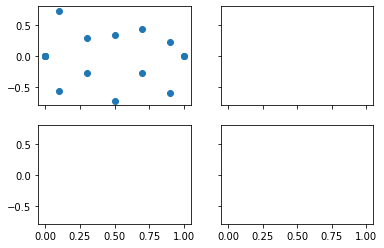

In [18]:
f = plt.figure()
f,axes = plt.subplots(2, 2, sharex=True, sharey=True)
sc = axes[0][0].scatter(ctp[:,0], ctp[:,1])
# axes[0][1].scatter(control_points[1,:,0], control_points[1,:,1])
# axes[1][0].scatter(control_points[2,:,0], control_points[2,:,1])
# axes[1][1].scatter(control_points[3,:,0], control_points[3,:,1])
plt.show()

In [77]:
ctp1 = ctp[1:-1,:]

In [78]:
ctp1

array([[ 0.        ,  0.        ],
       [ 0.1       ,  0.73421874],
       [ 0.3       ,  0.29076847],
       [ 0.5       ,  0.34569   ],
       [ 0.7       ,  0.44481877],
       [ 0.9       ,  0.23281343],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.9       , -0.59325538],
       [ 0.7       , -0.27075726],
       [ 0.5       , -0.71903238],
       [ 0.3       , -0.26464815],
       [ 0.1       , -0.55752031],
       [ 0.        ,  0.        ]])

<Figure size 432x288 with 0 Axes>

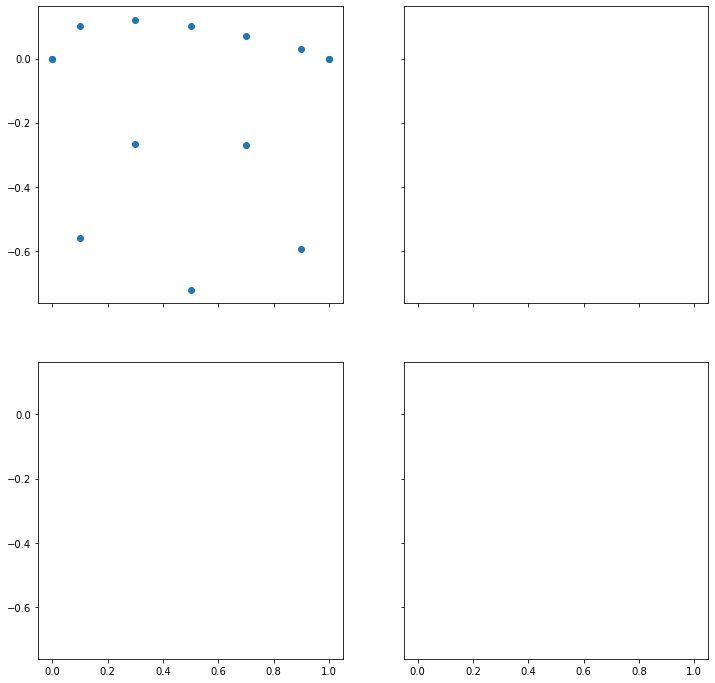

In [79]:
ctp1[1,1] = 0.1
ctp1[2,1] = 0.12
ctp1[3,1] = 0.1
ctp1[4,1] = 0.07
ctp1[5,1] = 0.03
# ctp1[9,1] = -0.03
# ctp1[10,1] = -0.07
# ctp1[11,1] = -0.1
# ctp1[12,1] = -0.12
# ctp1[13,1] = -0.1
f = plt.figure()
f,axes = plt.subplots(2, 2, figsize=(12,12), sharex=True, sharey=True)
sc = axes[0][0].scatter(ctp1[:,0], ctp1[:,1])
# axes[0][1].scatter(control_points[1,:,0], control_points[1,:,1])
# axes[1][0].scatter(control_points[2,:,0], control_points[2,:,1])
# axes[1][1].scatter(control_points[3,:,0], control_points[3,:,1])
plt.show()

In [80]:
pc, normals = get_normals(ctp1)

ValueError: Input is not a valid knot vector

<Figure size 432x288 with 0 Axes>

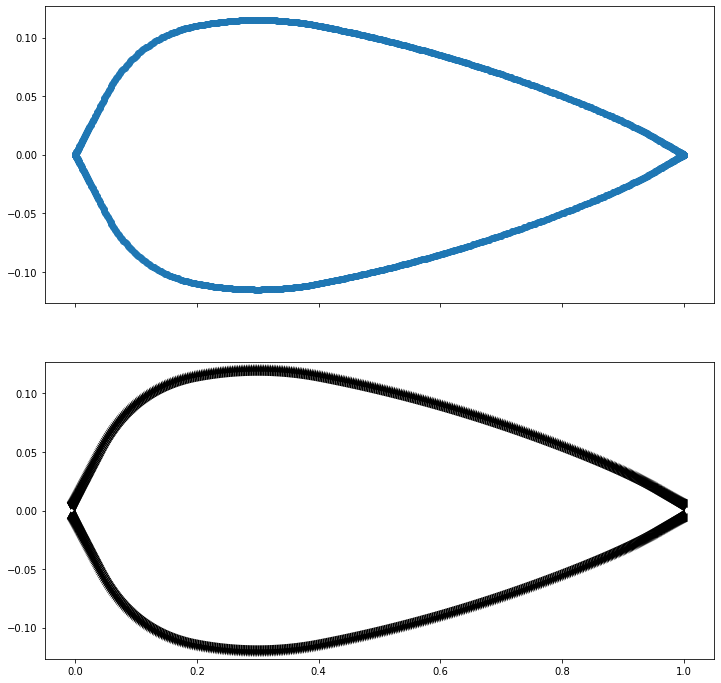

In [76]:
f = plt.figure()
f,axes = plt.subplots(2, 1, figsize=(12,12), sharex=True, sharey=True)
sc = axes[0].scatter(pc[:,0], pc[:,1])
axes[1].quiver(pc[:,0], pc[:,1], normals[:,0], normals[:,1])
# axes[1][0].scatter(control_points[2,:,0], control_points[2,:,1])
# axes[1][1].scatter(control_points[3,:,0], control_points[3,:,1])
plt.show()

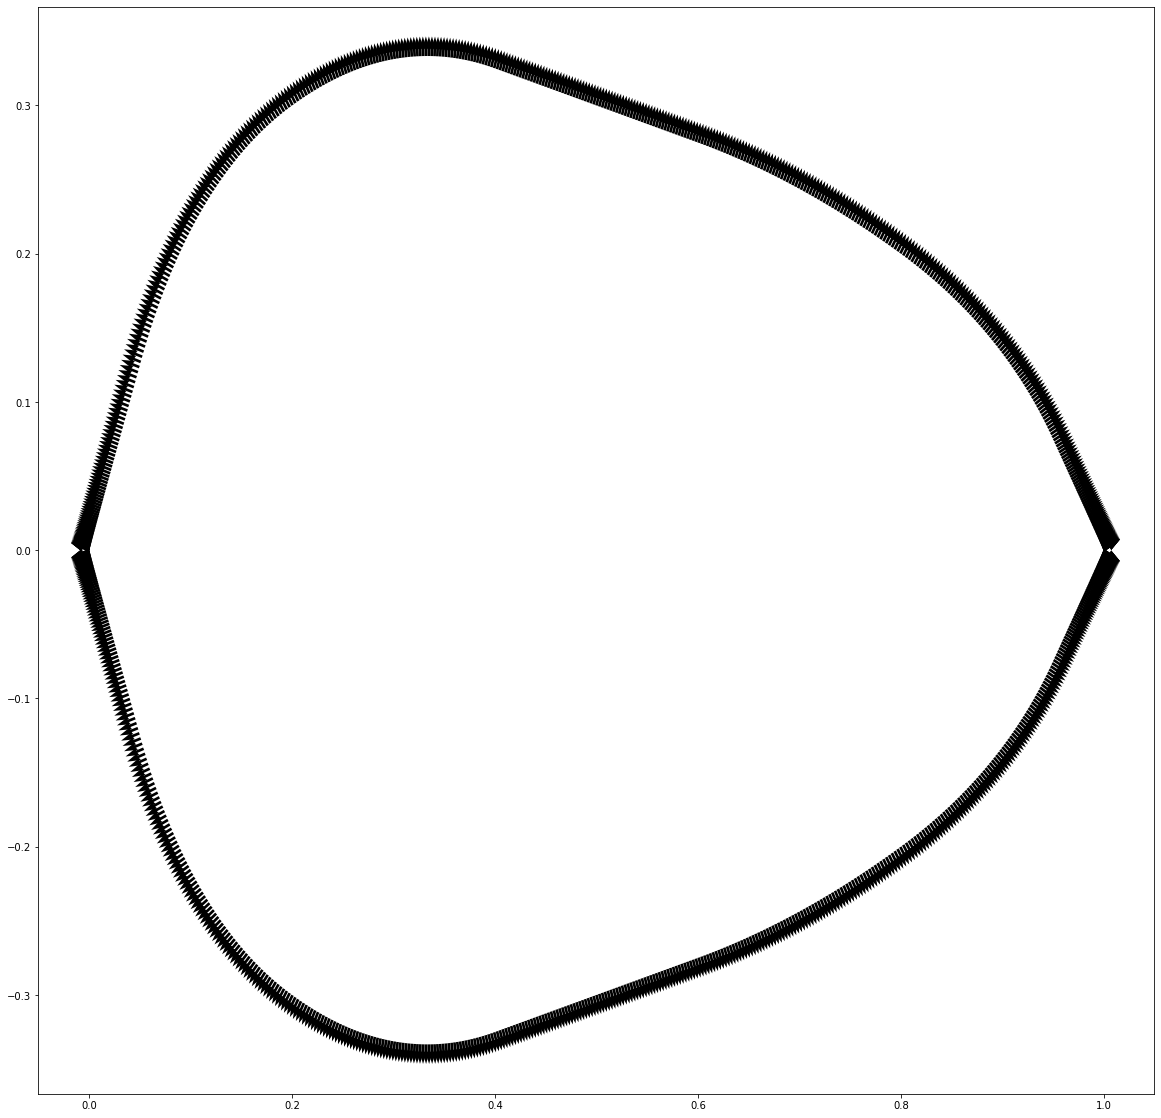

In [39]:
plt.figure(figsize=(20,20))
plt.quiver(pc[:,0], pc[:,1], normals[:,0], normals[:,1])